<a href="https://colab.research.google.com/github/marianateixeiraa/Aulas_Python/blob/main/dir_Exercise/Projeto2_perceptrons.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Projeto 2 - Perceptrons

Nesse segundo projeto da disciplina de Introdução a Python, vamos construir uma classe de um modelo de Redes Neurais, que é a base das Redes Neurais clássicas e Redes Neurais Profundas (Deep Learning), chamado Peceptron.

No mundo atual, o aprendizado de máquina está presente em muitas tecnologias à nossa volta: classificação de bilhões de imagens (por exemplo, Google Images), reconhecimento de fala (por exemplo, a Siri da Apple), recomendação de vídeos no YouTube, entre muitas outras.

![Aprendizado Supervisionado](https://miro.medium.com/max/1400/1*eEKb2RxREV6-MtLz2DNWFQ.gif)



1. Criar uma `Classe` Perceptron em Python. Vocês podem seguir o esqueleto de Classe apresentado abaixo.

In [ ]:
"""
 Projeto 2- Perceptrons
 Alunos: Vitor Gozzi e Mariana Teixeira
 Grupo: 2
"""


In [ ]:
## ESQUELETO DE CLASSE PERCEPTRON
import numpy as np

class MyPerceptron():

    def __init__(self, no_of_inputs, threshold=100, learning_rate=0.01):
        '''
        método de inicialização que tem os seguintes atributos:
        no_of_inputs: número de features passadas como input ao perceptron
        threshold: número de iterações de atualização do peso
        learning_rate: taxa com a qual os pesos são atualizados a cada iteração
        weights: inicialização dos pesos (dica: pode inicializar com método np.zeros). Não se esquecer que o vetor dos pesos
        terá no_of_inputs + 1 elementos por conta do bias que é o primeiro elemento.
        '''
        self.no_of_inputs = no_of_inputs
        self.threshold = threshold
        self.learning_rate = learning_rate
        self.weights = np.zeros(no_of_inputs + 1)

    def predict(self, inputs):
      '''
      método de implementação da função de ativação.
      inputs: array com o conjunto de inputs (features). No projeto pedimos que considerassem o comprimento e largura da pétala da Iris.
      Não se esquecer que o produto da função de ativação é um produto escalar e pode ser calculado pelo método np.dot
      '''
      somatorio_inputs_pesos = np.dot(inputs,self.weights[1:]) + self.weights[0]          # utilzando a função ativação dada acima
      if somatorio_inputs_pesos > 0 :
        ativação = 1
      else :
        ativação = 0
      return ativação

    def train(self, training_inputs, training_labels):
      '''
      método de treino. É aqui que os pesos são atualizados um certo número de vezes (determinado pelo valor do threshold).
      Nesse método é feita a comparação entre o resultado da função de ativação (predição) e
      o resultado esperado (label).
      O método deve atualizar tanto os pesos quanto o bias (lembre que o bias é o primeiro valor do vetor peso e tem input 1.)
      A atualização é feita iterativamente um número (threshold) de vezes.
      '''
      for i in range(self.threshold):
        for inputs,labels in zip(training_inputs,training_labels) :
          predicts = self.predict(inputs)
          e = labels - predicts
          atualização = self.learning_rate*e
          self.weights[1:] += atualização*inputs
          self.weights[0] += atualização
          
        


In [ ]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.linear_model import Perceptron

iris = load_iris() # returns a dictionary-like object
# características (features) das flores Iris:
print(iris.target_names)    # target = label
print(iris.feature_names)

# Pelo primeiro print acima, as features são: 0: sepal length, 1: sepal width, 2: petal length, 3: petal width
# E tambem os tipos de iris são: 0: setosa, 1: versicolor, 2: virginica

['setosa' 'versicolor' 'virginica']
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


2. Aplique essa classe nos dados das flores Iris para determinar se uma Iris com um certo comprimento e largura da **pétala** é uma Iris Setosa.


In [24]:
############### Pelo perceptron criado pelo aluno ###################

perceptron = MyPerceptron(2)
My_X = iris.data[:,(2,3)]                    # inputs
My_y = (iris.target == 0).astype(int)        # label = iris setosa. Retorna uma lista com os labels da Iris-Setosa. 0: não, 1: sim


treino = perceptron.train(My_X,My_y)
pred1 = perceptron.predict([1.4,0.2])
pred2 = perceptron.predict([3.9,1.1])
pred3 = perceptron.predict([5.4,2.3])
pred4 = perceptron.predict([2.4,0.7])
pred5 = perceptron.predict([4.0,1.1])
pred6 = perceptron.predict([6.2,2.7])


print(pred1,pred2,pred3, pred4, pred5, pred6)

1 0 0 1 0 0


In [28]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(iris.data[:,(2,3)], (iris.target == 0).astype(int))

perceptron = MyPerceptron(2)

treino = perceptron.train(x_train,y_train)

acertos = 0
total = len(y_test)

for i in range(total):
  resultado = perceptron.predict(x_train[i])
  if(resultado == y_test[i]):
    acertos += 1

print( (acertos/(total*1.0))*100 )


60.526315789473685


3. Compare o resultado da sua classe com a classe Peceptron do módulo do scikit-learn `linear_model`.

In [25]:
######## Pelo módulo do scikit-learn ########### 

# Vamos selecionar somente as features petal length e petal width:
X = iris.data[:,(2,3)]               # nos retorna um array com 150 conjuntos de inputs
Y = (iris.target == 0).astype(int)    # label = iris setosa. Retorna uma lista com os labels da Iris-Setosa. 0: não, 1: sim

perceptron_clf = Perceptron()         # dois inputs: comprimento e largura da pétala
perceptron_clf.fit(X,Y)               # Train
Y_pred = perceptron_clf.predict([[1.4,0.2],[3.9,1.1],[5.4,2.3],[2.4,0.7],[4.0,1.1],[6.2,2.7] ])       # predict
print(Y_pred)


[1 0 0 0 0 0]


In [29]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(iris.data[:,(2,3)], (iris.target == 0).astype(int))

perceptron_clf = Perceptron()
perceptron_clf.fit(x_train,y_train) 

perceptron_clf.score(x_test,y_test) 

1.0

R: Ao construir o nosso próprio código de Perceptron e ao comparar com o do módulo informado houve uma pequena desigualdade, dessa forma, analisando com uma maior cautela foi cosntruido um código de acuracidade e precisão de acerto para o modelo de Pereptron. Dessa forma, o modelo dado possui 100% de precisão de acerto e o nosso modelo se encontra, aproximadamente, com 60.5%. 
Uma explicação possivel para essa porcentagem, em relação ao modelo construido, ocorre por conta de se tratar de um programa muito básico, logo essa acuracidade seria maior se fosse construido um modelo percepton de outra forma. 

4. Você pode pensar em algum outro exemplo em que possa aplicar o modelo do Perceptron? Quando esse modelo falha?

R: Um outro exemplo que pode ser aplicado o modelo do Perceptron é direcionado para um deslocamento de um corpo desde que não haja uma aceleração, pois isso alteraria o modelo linear no qual se baseia o código do nosso Perceptron. Esse modelo haverá uma falha quando levar em consideração o deslocamento acelerado onde o modelo deixará de ser linear. 

* Você pode expandir o código para considerar também o comprimento e largura da sépala como features;




In [31]:
perceptron = MyPerceptron(4)
My_X = iris.data[:]                    # inputs
My_y = (iris.target == 0).astype(int)        # label = iris setosa. Retorna uma lista com os labels da Iris-Setosa. 0: não, 1: sim

treino = perceptron.train(My_X,My_y)
pred1 = perceptron.predict([5.1, 3.5, 1.4, 0.2])
pred2 = perceptron.predict([4.9, 3.1, 1.5, 0.2])
pred3 = perceptron.predict([6.4, 3.2, 4.5, 1.5])
pred4 = perceptron.predict([5.9, 3.2, 4.8, 1.8])
pred5 = perceptron.predict([5.6, 3.0,  4.1, 1.3])
pred6 = perceptron.predict([7.2, 3.0,  5.8, 1.6])


print(pred1,pred2,pred3, pred4, pred5, pred6)

1 1 0 0 0 0


* Você pode separar a amostra das Iris em duas: uma para treino e outra para teste. O scikit-learn tem um método que faz isso pra você: o `train_test_slit`; Compare cada uma das Iris de teste com o label ==> coloque o resultado em um gráfico (classificação versus label);

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f53d3b4ecd0>,
      dtype=object)

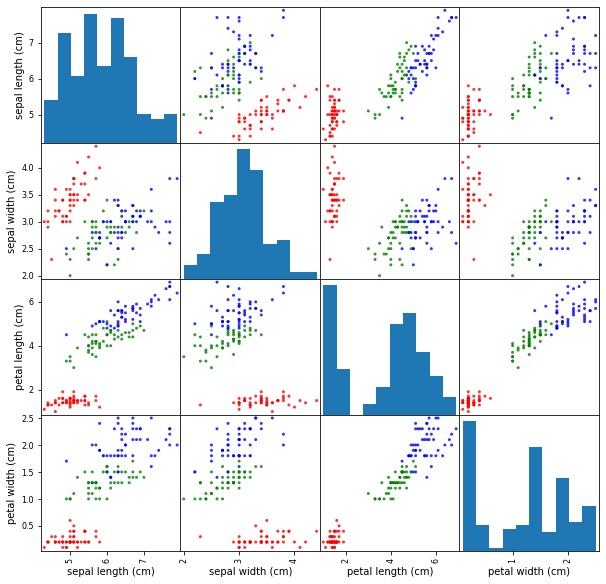

In [ ]:
from sklearn.datasets import load_iris
from numpy import array
from pandas import DataFrame
from pandas.plotting import scatter_matrix

iris = load_iris()
df = DataFrame(iris.data, columns=iris.feature_names)
colors=array(50*['r']+50*['g']+50*['b'])
scatter_matrix(df, alpha=0.8, figsize=(10,10), color=colors)

R: A partir dos gráficos acima é possivel notar que ocorrerá uma precisão maior quando houver um distânciamento entre as cores, como por exemplo, a cor vermelha (setosa), correspondendo uma maior acuracidade quando comparada com as outras duas cores: verde (Versicolor) e azul (Virginica). Outro caso que vale ressaltar é a comparação entre as cores verde e azul, onde pode-se notar que é dificil delimitar as suas regiões se tornando dificil ter uma maior precisão dos dados. 

## Referências:

1. Hands-on Machine Learning with Scikit-Learn, Keras and TensorFlow, Aurélion Géron, O'Reilly;
1. *Introdução ao numpy*: https://sebastianraschka.com/pdf/books/dlb/appendix_f_numpy-intro.pdf